In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# A function to create a dataset.
from sklearn.datasets import make_regression
# A library for data manipulation and analysis.
import pandas as pd
import w3_tools
# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3) 

In [ ]:
m = 30

X, Y = make_regression(n_samples=m, n_features=1, noise=20, random_state=1)

X = X.reshape((1, m))
Y = Y.reshape((1, m))

print('Training dataset X:')
print(X)
print('Training dataset Y')
print(Y)

Text(0, 0.5, '$y$')

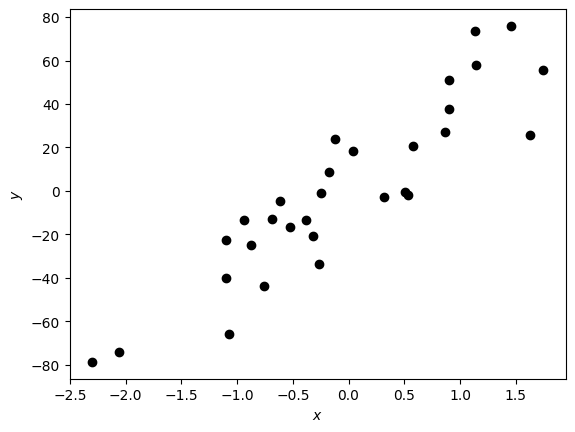

In [3]:
plt.scatter(X,  Y, c="black")

plt.xlabel("$x$")
plt.ylabel("$y$")

In [4]:
shape_X = X.shape
# Shape of variable Y.
shape_Y = Y.shape
# Training set size.
m = X.size
### END CODE HERE ###

print ('The shape of X: ' + str(shape_X))
print ('The shape of Y: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X: (1, 30)
The shape of Y: (1, 30)
I have m = 30 training examples!


In [6]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    # Size of input layer.
    n_x = X.shape[0]
    # Size of output layer.
    n_y = Y.shape[0]
    return (n_x, n_y)

In [7]:
(n_x, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


In [8]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    
    ### START CODE HERE ### (~ 2 lines of code)
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert (W.shape == (n_y, n_x))
    assert (b.shape == (n_y, 1))
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

In [9]:
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[-0.00325397]]
b = [[0.]]


In [10]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output
    """
    # Retrieve each parameter from the dictionary "parameters".

    
    W = parameters["W"]
    b = parameters["b"]    
    # Implement Forward Propagation to calculate Z.
    
    Z = np.dot(W, X) + b
    Y_hat = Z
    
    assert(Y_hat.shape == (n_y, X.shape[1]))

    return Y_hat

In [11]:
Y_hat = forward_propagation(X, parameters)

print(Y_hat)

[[-0.00103814  0.0034914  -0.00281601  0.00056108 -0.00372489 -0.0016351
   0.00748913  0.00222483  0.0012497   0.00285652  0.00670363  0.00358138
   0.00357901 -0.00368925 -0.00567756  0.00039988  0.00304496 -0.00528557
  -0.00475765 -0.00293375  0.00247694 -0.00172576  0.00171865  0.0008717
  -0.00189646 -0.00013736 -0.00293136  0.00081144  0.00199064  0.00104914]]


In [12]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    
    return cost

In [13]:
print("cost = " + str(compute_cost(Y_hat, Y)))

cost = 790.9875434400619


In [ ]:
parameters = w3_tools.train_nn(parameters, Y_hat, X, Y)

print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

In [ ]:
def nn_model(X, Y, num_iterations=10, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    # Initialize parameters
    ### START CODE HERE ### (~ 1 line of code)
    parameters = initialize_parameters(n_x, n_y)
    ### END CODE HERE ###
    
    # Loop
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (~ 2 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "Y_hat".
        Y_hat = np.dot(parameters["W"], X) + parameters["b"]
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = np.sum((Y_hat - Y)**2)/(2*Y.shape[1])
        ### END CODE HERE ###
        
        
        # Parameters update.
        parameters = w3_tools.train_nn(parameters, Y_hat, X, Y) 
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [ ]:
parameters = nn_model(X, Y, num_iterations=15, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]


In [ ]:
X_pred = np.array([-0.95, 0.2, 1.5])

fig, ax = plt.subplots()
plt.scatter(X, Y, color = "black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
ax.plot(X_line, W_simple[0,0] * X_line + b_simple[0,0], "r")
ax.plot(X_pred, W_simple[0,0] * X_pred + b_simple[0,0], "bo")
plt.plot()
plt.show()

In [ ]:
df = pd.read_csv('house_prices_train.csv')

In [ ]:
X_multi = df[['GrLivArea', 'OverallQual']]
Y_multi = df['SalePrice']

In [ ]:
print(f"X_multi:\n{X_multi}\n")
print(f"Y_multi:\n{Y_multi}\n")

In [ ]:
X_multi_norm = (X_multi - np.mean(X_multi))/np.std(X_multi)
Y_multi_norm = (Y_multi - np.mean(Y_multi))/np.std(Y_multi)

In [ ]:
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1, len(Y_multi_norm)))

print ('The shape of X: ' + str(X_multi_norm.shape))
print ('The shape of Y: ' + str(Y_multi_norm.shape))
print ('I have m = %d training examples!' % (X_multi_norm.shape[1]))

In [ ]:
### START CODE HERE ### (~ 1 line of code)
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, print_cost=True)
### END CODE HERE ###

print("W = " + str(parameters_multi["W"]))
print("b = " + str(parameters_multi["b"]))

W_multi = parameters_multi["W"]
b_multi = parameters_multi["b"]

In [ ]:
X_pred_multi = np.array([[1710, 7], [1200, 6], [2200, 8]]).T

# Normalize using the same mean and standard deviation of the original training array X_multi.
X_multi_mean = np.array(np.mean(X_multi)).reshape((2,1))
X_multi_std = np.array(np.std(X_multi)).reshape((2,1))
X_pred_multi_norm = (X_pred_multi - X_multi_mean)/ X_multi_std
# Make predictions.
Y_pred_multi_norm = np.matmul(W_multi, X_pred_multi_norm) + b_multi
# Denormalize using the same mean and standard deviation of the original training array Y_multi.
Y_pred_multi = Y_pred_multi_norm * np.std(Y_multi) + np.mean(Y_multi)

print(f"Ground living area, square feet:\n{X_pred_multi[0]}")
print(f"Rates of the overall quality of material and finish, 1-10:\n{X_pred_multi[1]}")
print(f"Predictions of sales price, $:\n{np.round(Y_pred_multi)}")